This is a numpy implementation of Chapter 5 code in [P. Shirley, Ray Tracing in One Weekend](https://raytracing.github.io/books/RayTracingInOneWeekend.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/username/Documents/GitHub/ray_tracer/weekend_shirley/numpy_rays')
from tracing import *

In [2]:
def color(ray: Ray, surf: Surface, t_max: float = 1e6) -> Vec3:
    # return closest hits and normals
    t, normal = surf.hit(ray, 0, t_max)
    
    # object color
    color1 = Vec3(normal.x + 1, normal.y + 1, normal.z + 1) * 0.5  
    
    # skybox color
    unit_direction = ray.dir.normalize()
    t2 = 0.5 * (unit_direction.y + 1.0)
    color2 = Vec3(1, 1, 1) * (1.0 - t2) + Vec3(0.5, 0.7, 1) * t2
    
    surf_hit = (0 < t) & (t < t_max)
    # replace sky color with object color where the object is hit
    color2.x[surf_hit] = color1.x[surf_hit]
    color2.y[surf_hit] = color1.y[surf_hit]
    color2.z[surf_hit] = color1.z[surf_hit]
    
    return color2

Wall time: 3.03 s


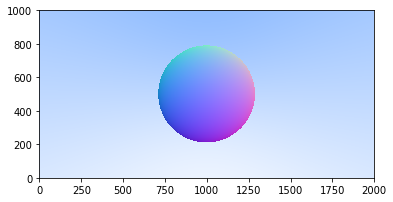

In [3]:
%%time
nx, ny = 2000, 1000
lower_left_corner = Vec3(-2, -1, -1)
horizontal = Vec3(4, 0, 0)
vertical = Vec3(0, 2, 0)
origin = Vec3(0, 0, 0)

world = Sphere(Vec3(0, 0, -1), 0.5)

u = np.tile(np.linspace(0, (nx - 1.0)/nx, nx), ny)
v = np.repeat(np.linspace(0, (ny - 1.0)/ny, ny), nx)
rays = Ray(origin, lower_left_corner + horizontal*u + vertical*v)
    
col = color(rays, world)
rgb = np.dstack((col.x.reshape(ny, nx), col.y.reshape(ny, nx), col.z.reshape(ny, nx)))
plt.imshow(rgb, origin='lower')

Wall time: 3.37 s


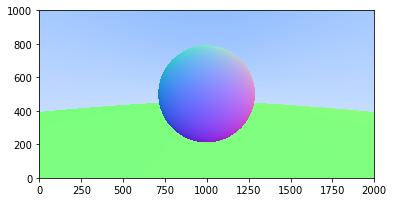

In [4]:
%%time
world = SurfaceList([Sphere(Vec3(0, 0, -1), 0.5), Sphere(Vec3(0, -100.5, -1), 100)])
col = color(rays, world)
rgb = np.dstack((col.x.reshape(ny, nx), col.y.reshape(ny, nx), col.z.reshape(ny, nx)))
plt.imshow(rgb, origin='lower')

Wall time: 4.9 s


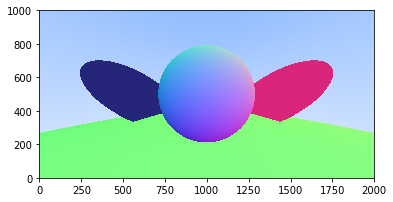

In [21]:
%%time
world = SurfaceList([Sphere(Vec3(0, 0, -1), radius=0.5), 
                     Sphere(Vec3(0, -20.5, -1), radius=20),
                     Disk(center=Vec3(-2, 0, -3), normal=Vec3(-1, -1, -0.05), radius=1.5),
                     Disk(center=Vec3(2, 0, -3), normal=Vec3(1, -1, -0.05), radius=1.5)])
col = color(rays, world)
rgb = np.dstack((col.x.reshape(ny, nx), col.y.reshape(ny, nx), col.z.reshape(ny, nx)))
plt.imshow(rgb, origin='lower')